In [39]:
%matplotlib inline
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.mixture import BayesianGaussianMixture

from scipy.stats import expon, beta, binom

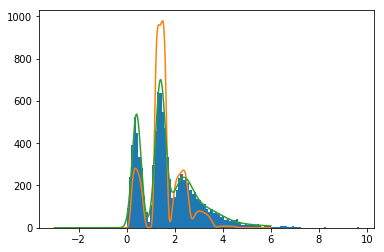

In [120]:
def weird_pdf(size):
    return binom.rvs(p=0.5, n=1,size=size)*expon.rvs(0.7, 1, size=size) + .6*beta.rvs(1, 1.5, size=size) + .3*beta.rvs(1, 0.7, size=size) + binom.rvs(p=0.5, n=1,size=size)

N = 10000
#s = weird_pdf(N)
s = s[:,0]
s = np.stack([s, (s+10)**2, s**3, (s+10)**4]).T

m = BayesianGaussianMixture(n_components=8, max_iter=1000)
m.fit(s)
#X = np.linspace(-3, 6, 10000)
X_ = np.stack([X, (X+10)**2, X**3, (X+10)**4]).T
y = np.exp(m.score_samples(X_))

m2 = BayesianGaussianMixture(n_components=8, max_iter=10000)
m2.fit(s[:,0:1])
y2 = np.exp(m2.score_samples(X[:,None]))

plt.figure()
plt.hist(s[:,0], bins=100)
plt.plot(X, y*N/3)
plt.plot(X, y2*N/10)
#plt.plot(X, y3)#*N/3.3)
plt.show()